# Ensemble Methods for Regression
In this notebook, we will demonstrate how to use ensemble methods for regression using the **Random Forest Regressor** and **Gradient Boosting Regressor**. We will also explore combining these models using the **Voting Regressor** and **Stacking Regressor**.

### Step 1: Load and Preprocess the Dataset
We'll load the **California Housing Prices** dataset and preprocess it for regression tasks.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset 

housingdata=pd.read_csv('Datasets/california_housing.csv')

# Check the first few rows of the dataset
housingdata.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


### Step 2: Select Features and Target
We will separate the features (X) and the target (y), and then split the data into training and testing sets.

In [2]:
# Select features (X) and target (y)
X = housingdata.drop(columns=['medianHouseValue'])
y = housingdata['medianHouseValue']

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Train Base Models (Random Forest & Gradient Boosting)
We'll now apply **Random Forest Regressor** and **Gradient Boosting Regressor** individually.

In [5]:
# Initialize the base regressors
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [6]:
# Train the base models
rf_regressor.fit(X_train_scaled, y_train)
gb_regressor.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [7]:
# Predict using the base models
y_pred_rf = rf_regressor.predict(X_test_scaled)
y_pred_gb = gb_regressor.predict(X_test_scaled)

In [8]:
# Evaluate the base models using Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

In [9]:
print(f'Random Forest MSE: {mse_rf:.4f}')
print(f'Gradient Boosting MSE: {mse_gb:.4f}')

Random Forest MSE: 2434964783.6812
Gradient Boosting MSE: 2960108244.5863


### Step 4: Combine Models Using Voting Regressor
Now we combine the predictions of the **Random Forest** and **Gradient Boosting** regressors using a **Voting Regressor**.

In [10]:
# Combine the models using a Voting Regressor
ensemble_model = VotingRegressor(estimators=[('rf', rf_regressor), ('gb', gb_regressor)])

In [11]:
# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42))])

In [12]:
# Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

In [13]:
# Evaluate the ensemble model using Mean Squared Error
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)

In [14]:
print(f'Ensemble Model (Voting Regressor) MSE: {mse_ensemble:.4f}')

Ensemble Model (Voting Regressor) MSE: 2496233594.2496


### Step 5: Compare the Results
Let's compare the **Mean Squared Error (MSE)** values of the individual models and the ensemble model.

In [15]:
# Print the MSE of individual models and the ensemble model
print('\nModel Performance Comparison:')
print(f'Random Forest MSE: {mse_rf:.4f}')
print(f'Gradient Boosting MSE: {mse_gb:.4f}')
print(f'Ensemble (Voting) Model MSE: {mse_ensemble:.4f}')


Model Performance Comparison:
Random Forest MSE: 2434964783.6812
Gradient Boosting MSE: 2960108244.5863
Ensemble (Voting) Model MSE: 2496233594.2496


### Step 6: Visualize the Results
Let's visualize the predicted vs actual values for the ensemble model.

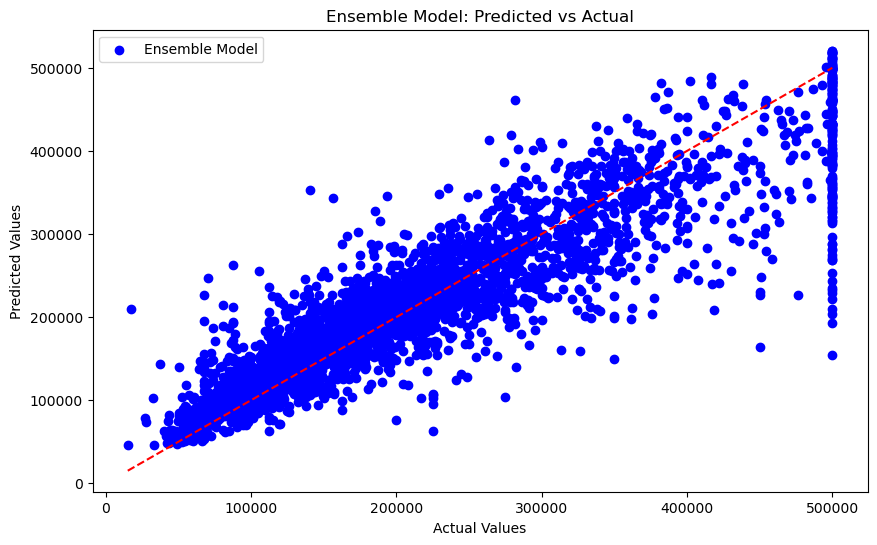

In [16]:
# Plotting the predicted vs actual values for the ensemble model
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_ensemble, color='blue', label='Ensemble Model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ensemble Model: Predicted vs Actual')
plt.legend()
plt.show()

### Step 7: Alternative Ensemble Method - Stacking Regressor
We can also try a **Stacking Regressor** which combines the base models using another model (e.g., Linear Regression) to make final predictions.

In [17]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [18]:
# Create the base models for stacking
estimators = [
    ('rf', rf_regressor),
    ('gb', gb_regressor)
]

In [19]:
# Create the stacking regressor using a linear regression as the final estimator
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

In [20]:
# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [21]:
# Make predictions with the stacking model
y_pred_stacking = stacking_model.predict(X_test_scaled)

In [22]:
# Evaluate the stacking model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
print(f'Stacking Regressor MSE: {mse_stacking:.4f}')

Stacking Regressor MSE: 2393285638.1205
